# Analyse d'une base de données d'avions

## Présentation de la base de données

__L'ensemble de données comprend 33 variables sur 44 avions, y compris des mesures quantitatives sur des attributs tels que la vitesse de croisière, l'hébergement et l'autonomie en miles, ainsi que des données catégorielles sur, par exemple, le fait qu'un avion particulier dispose du Wi-Fi ou de la vidéo. Ces variables catégorielles binaires ont été transformées en variables quantitatives en leur attribuant la valeur 1 ou 0, pour oui ou non respectivement.__

Il existe 4 classes possible : Club, Business, First Class et Economy. Chaque avion peut inclure une ou plusieurs de ces classes.

- Aircraft : le nom de l'avion
- Seat Width (Club) : Largeur des sièges
- Seat Pitch (Club) : Espace entre les sièges
- Seat (Club) : Nombre de sièges
- Seat Width (First Class) : Largeur des sièges
- Seat Pitch (First Class) : Espace entre les sièges
- Seats (First Class) : Nombre de sièges
- Seat Width (Business) : Largeur des sièges
- Seat Pitch (Business) : Espace entre les sièges
- Seats (Business) : Nombre de sièges
- Seat Width (Eco Comfort) : Largeur des sièges
- Seat Pitch (Eco Comfort) : Espace entre les sièges
- Seats (Eco Comfort) : Nombre de sièges
- Seat Width (Economy) : Largeur des sièges
- Seat Pitch (Economy) : Espace entre les sièges
- Seats (Economy) : Nombre de sièges
- Accommodation : Hébergement
- Cruising Speed (mph) : Vitesse de croisière
- Range (miles) : Autonomie (miles)
- Engines : Nombre de moteurs
- Wingspan (ft) : Envergure des ailes (ft) de l'avion.
- Tail Height (ft) : Hauteur de la queue de l'avion (ft).
- Length (ft) : Longueur (ft) de l'avion.
- Wifi : Variable binaire 0 pour non disponible, 1 pour disponible
- Video : Variable binaire 0 pour non disponible, 1 pour disponible
- Power : Variable binaire 0 pour non disponible, 1 pour disponible
- Satellite : Variable binaire 0 pour non disponible, 1 pour disponible
- Flat-bed : Variable binaire 0 pour non disponible, 1 pour disponible
- Sleeper : Variable binaire 0 pour non disponible, 1 pour disponible
- Club : Variable binaire 0 pour non disponible, 1 pour disponible
- First Class : Variable binaire 0 pour non disponible, 1 pour disponible
- Business : Variable binaire 0 pour non disponible, 1 pour disponible
- Eco Comfort : Variable binaire 0 pour non disponible, 1 pour disponible
- Economy : Variable binaire 0 pour non disponible, 1 pour disponible

In [89]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
# Import des données
data = pd.read_csv('DATA.txt', sep=",")
data.head()

Aircraft  Seat Width (Club)  Seat Pitch (Club)  Seat (Club)  \
0       Airbus A319                0.0                  0            0   
1   Airbus A319 VIP               19.4                 44           12   
2       Airbus A320                0.0                  0            0   
3  Airbus A320 32-R                0.0                  0            0   
4   Airbus A330-200                0.0                  0            0   

   Seat Width (First Class)  Seat Pitch (First Class)  Seats (First Class)  \
0                      21.0                      36.0                   12   
1                      19.4                      40.0                   28   
2                      21.0                      36.0                   12   
3                      21.0                      36.0                   12   
4                       0.0                       0.0                    0   

   Seat Width (Business)  Seat Pitch (Business)  Seats (Business)  ...  Video  \
0                    0.0                    0.0                 0  ...      0   
1                   21.0                   59.0                14  ...      1   
2                    0.0                    0.0                 0  ...      0   
3                    0.0                    0.0                 0  ...      0   
4                   21.0                   60.0                32  ...      1   

   Power  Satellite  Flat-bed  Sleeper  Club  First Class  Business  \
0      0          0         0        0     0            1         0   
1      0          0         0        0     1            1         1   
2      0          0         0        0     0            1         0   
3      0          0         0        0     0            1         0   
4      1          0         1        0     0            0         1   

   Eco Comfort  Economy  
0            1        1  
1            0        0  
2            1        1  
3            1        1  
4            1        1  

[5 rows x 34 columns]

## Enoncé

__1. Extraire les données quantitatives (y compris les variables catégorielles qui ont été transformé en variables quantitatives) et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, tracer le graphique correspondant et analyser. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des avions qui composent chacune des classes.
   - En effectuant l'étude ACP sur deux dimensions, est-il intéressant d'éliminer une classe ? Si oui, effectuer la démarche et      analyser.
   

1 . Extraction des données quantitatives et synthése : 

In [91]:
df=data.iloc[:,1:34]
#Extraction des données quantitatives .

In [92]:
#Synthése des données :
df.describe()

Seat Width (Club)  Seat Pitch (Club)  Seat (Club)  \
count          44.000000           44.00000    44.000000   
mean            0.440909            1.00000     0.272727   
std             2.924660            6.63325     1.809068   
min             0.000000            0.00000     0.000000   
25%             0.000000            0.00000     0.000000   
50%             0.000000            0.00000     0.000000   
75%             0.000000            0.00000     0.000000   
max            19.400000           44.00000    12.000000   

       Seat Width (First Class)  Seat Pitch (First Class)  \
count                 44.000000                 44.000000   
mean                  11.488636                 21.852273   
std                   10.154120                 19.608250   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                   18.950000                 36.000000   
75%                   21.000000                 37.000000   
max                   21.000000                 60.000000   

       Seats (First Class)  Seat Width (Business)  Seat Pitch (Business)  \
count            44.000000              44.000000              44.000000   
mean             10.545455               7.545455              25.551136   
std              10.801495              10.104580              35.050428   
min               0.000000               0.000000               0.000000   
25%               0.000000               0.000000               0.000000   
50%              12.000000               0.000000               0.000000   
75%              17.000000              21.000000              60.000000   
max              36.000000              21.000000              82.000000   

       Seats (Business)  Seat Width (Eco Comfort)  ...      Video      Power  \
count         44.000000                 44.000000  ...  44.000000  44.000000   
mean          11.863636                 15.654545  ...   0.613636   0.568182   
std           16.861392                  5.685404  ...   0.492545   0.501056   
min            0.000000                  0.000000  ...   0.000000   0.000000   
25%            0.000000                 17.200000  ...   0.000000   0.000000   
50%            0.000000                 17.300000  ...   1.000000   1.000000   
75%           27.000000                 18.000000  ...   1.000000   1.000000   
max           48.000000                 18.500000  ...   1.000000   1.000000   

       Satellite   Flat-bed    Sleeper       Club  First Class   Business  \
count  44.000000  44.000000  44.000000  44.000000    44.000000  44.000000   
mean    0.136364   0.204545   0.136364   0.022727     0.545455   0.386364   
std     0.347142   0.408032   0.347142   0.150756     0.503686   0.492545   
min     0.000000   0.000000   0.000000   0.000000     0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000     0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000     1.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000     1.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000     1.000000   1.000000   

       Eco Comfort    Economy  
count    44.000000  44.000000  
mean      0.886364   0.977273  
std       0.321038   0.150756  
min       0.000000   0.000000  
25%       1.000000   1.000000  
50%       1.000000   1.000000  
75%       1.000000   1.000000  
max       1.000000   1.000000  

[8 rows x 33 columns]

2.Analyse ACP :

In [93]:
x=df.values

In [94]:
#Instanciation pour l'ACP : 
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(x) #Centrer et réduire les données .

In [95]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
n = (acp.n_components_)




On trace comme demandé le graphique des individus par rapport aux deux premiers axes : 

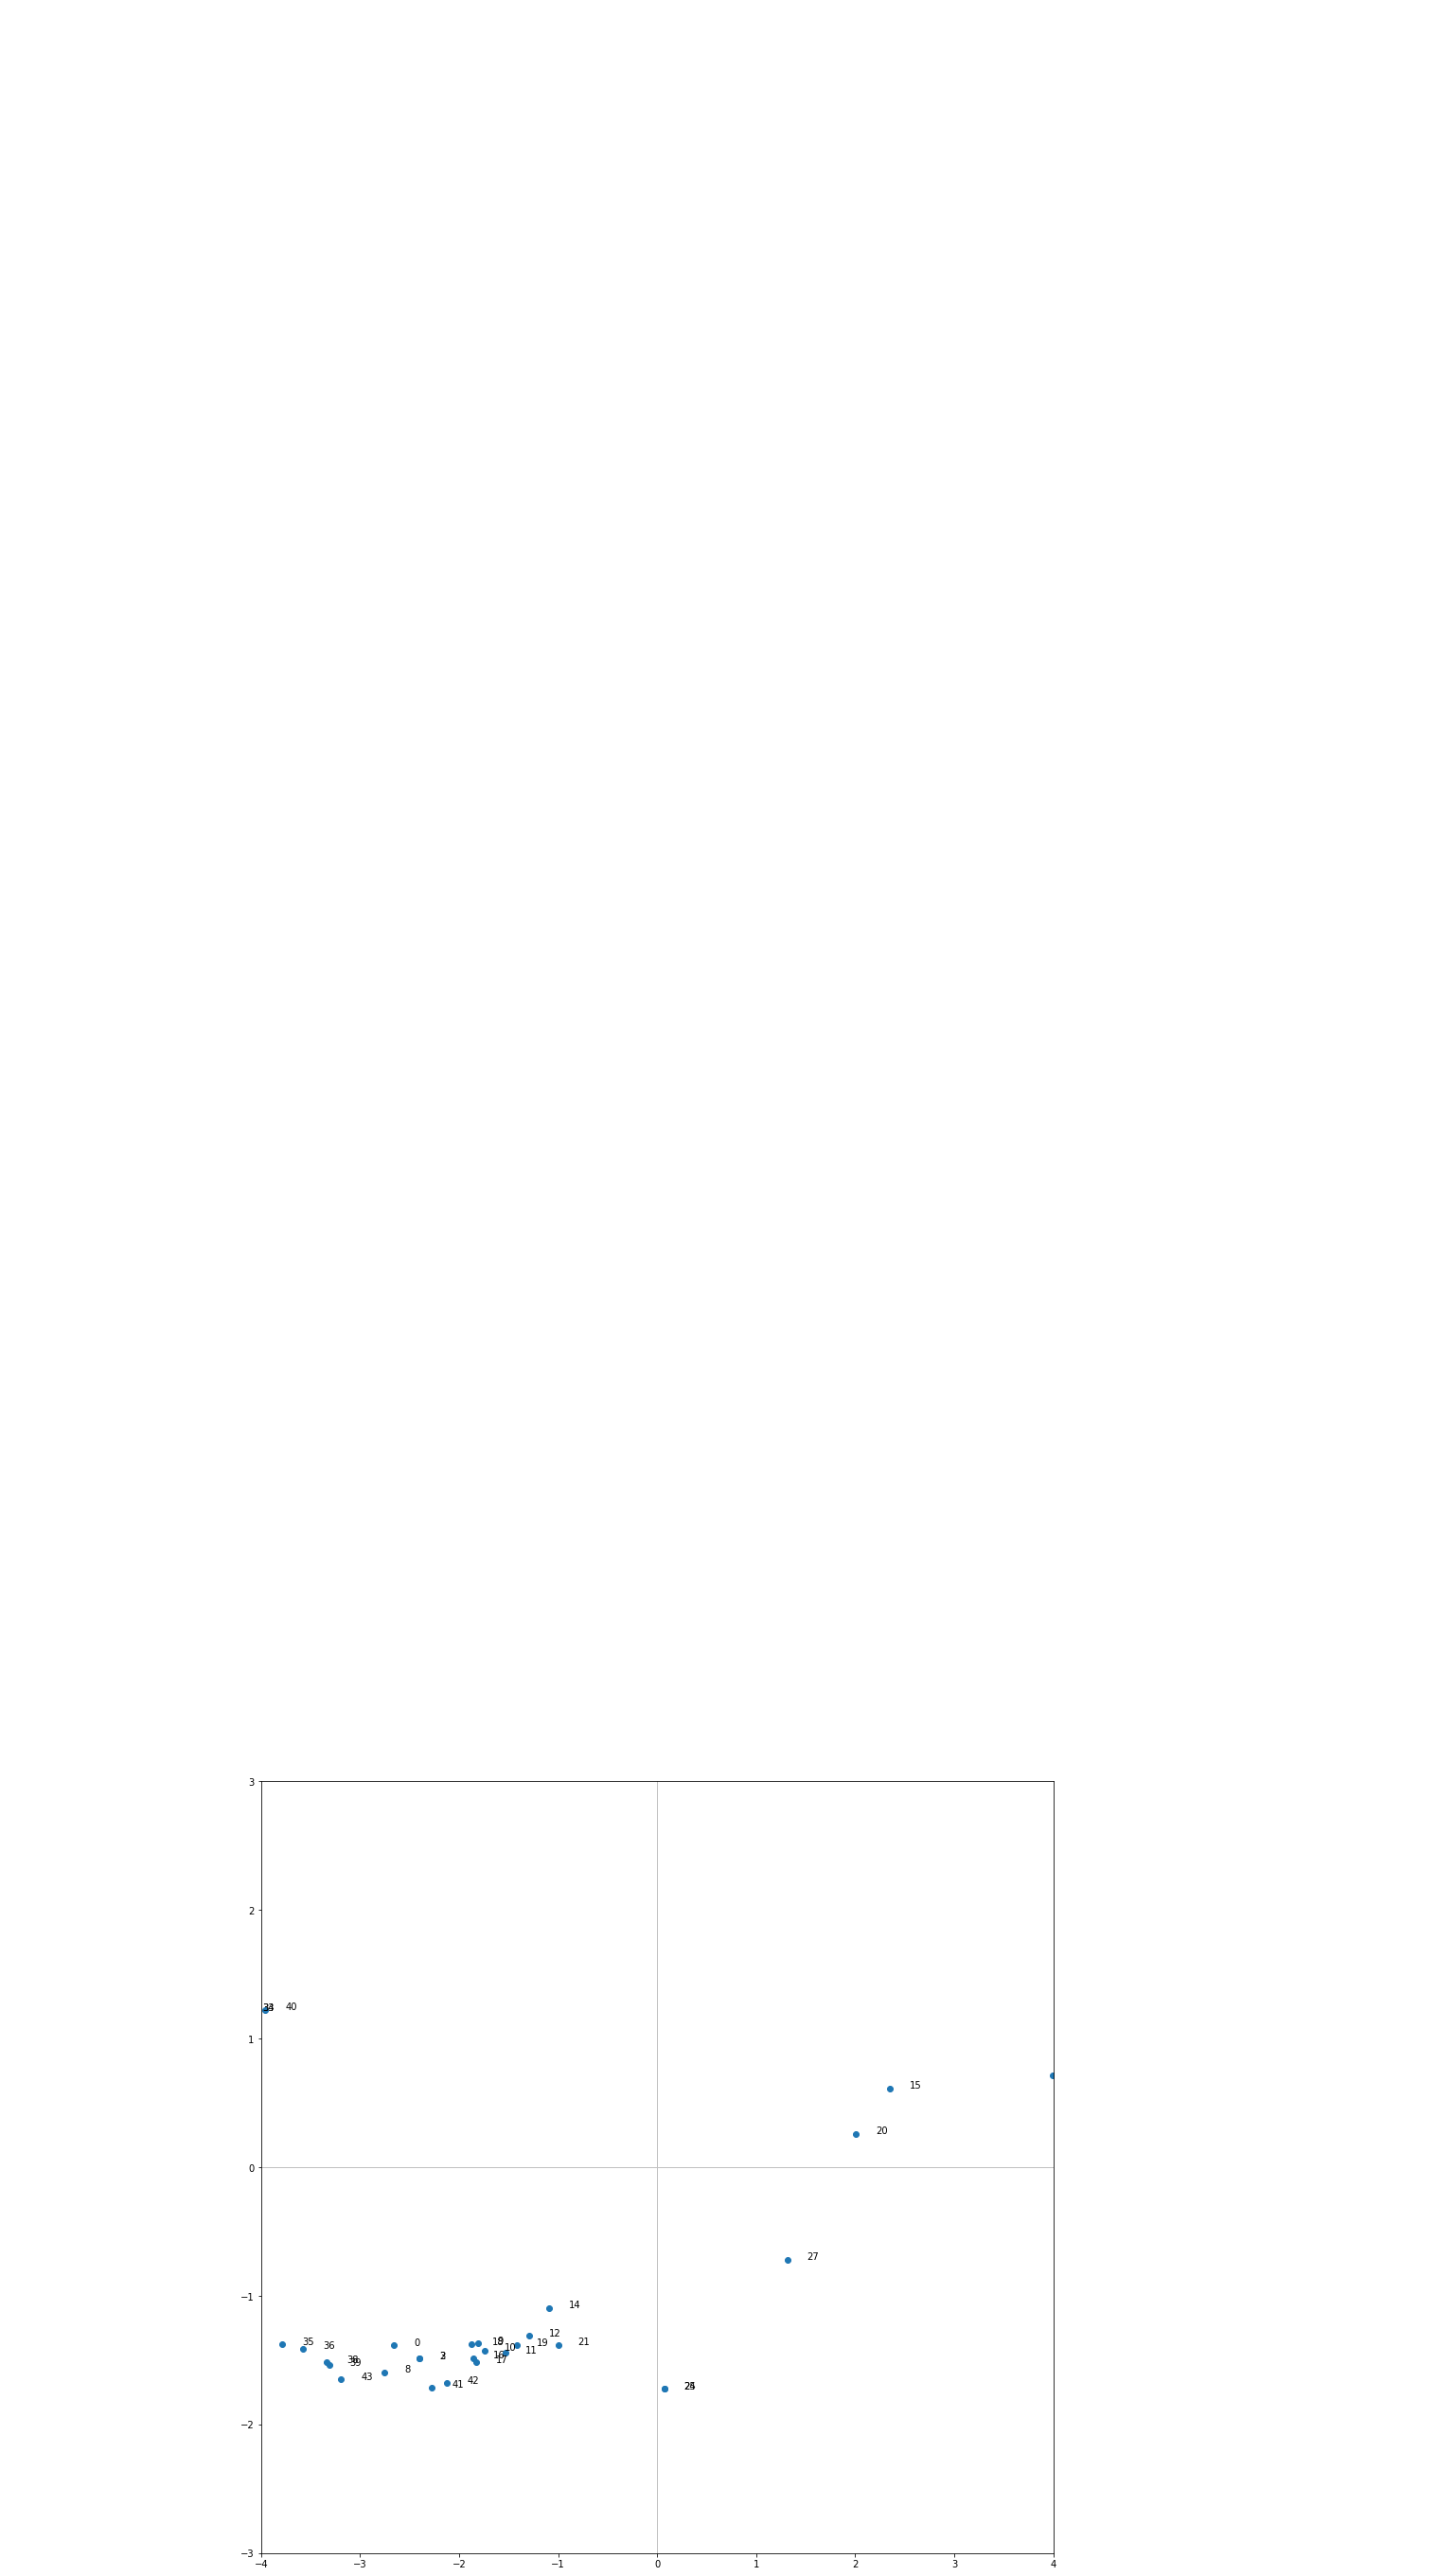

In [96]:
#positionnement des avions individus dans le plan :
fig, axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(44):
     plt.annotate(data.index[i],(coord[i,0]+0.2,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

La plus part des avions s'entassent dans le graphique (en bas à gauche ) avec quelques expections (avion 15 20 27 28 40 ) . Cela veut dire qu'il y'a des groupes parmi les avions qui ont des caractéristiques similaires.
On recense le groupe en bas à droite , un groupe en haut à gauche et deux potentiels groupes à droite du graphique .

In [97]:
#valeurs propres et variances par chaque composante:
# valeurs propres
variance = acp.explained_variance_

eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval[0:2])


[13.5587286   7.95598723]


In [98]:
# ratio de réprésentation des valeurs propres
print(acp.explained_variance_ratio_[0:3])

[0.41087056 0.24109052 0.15316606]


Dans ce cas la quantité d'information préservé avec les 2 premiers axes est égale à 65% .

Utilisation des métriques : 


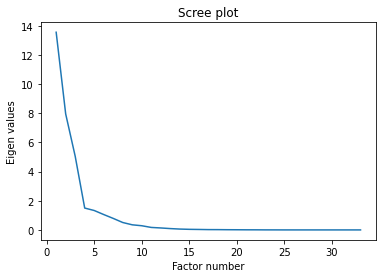

In [99]:
# scree plot : éboulis des valeurs propres

plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

La plus grande cassure se situe au niveau du 4éme axe . Cette métrique suggère de prendre les 4 premiers axes . 

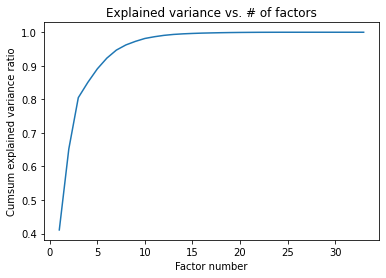

In [100]:
# cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Le graphique est constant à partir du 10éme axe . Cette métrique suggère de prendre les 10 premiers axes dans notre analyse . 

In [101]:
#test des bâtons brisés
bk = 1/np.arange(n,0,-1)
print(bk)
bk = np.cumsum(bk)
print(bk)
bk = bk[::-1]
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

[0.03030303 0.03125    0.03225806 0.03333333 0.03448276 0.03571429
 0.03703704 0.03846154 0.04       0.04166667 0.04347826 0.04545455
 0.04761905 0.05       0.05263158 0.05555556 0.05882353 0.0625
 0.06666667 0.07142857 0.07692308 0.08333333 0.09090909 0.1
 0.11111111 0.125      0.14285714 0.16666667 0.2        0.25
 0.33333333 0.5        1.        ]
[0.03030303 0.06155303 0.09381109 0.12714443 0.16162719 0.19734147
 0.23437851 0.27284005 0.31284005 0.35450671 0.39798498 0.44343952
 0.49105857 0.54105857 0.59369015 0.6492457  0.70806923 0.77056923
 0.8372359  0.90866447 0.98558755 1.06892088 1.15982997 1.25982997
 1.37094108 1.49594108 1.63879823 1.80546489 2.00546489 2.25546489
 2.58879823 3.08879823 4.08879823]
      Val.Propre    Seuils
0   1.355873e+01  4.088798
1   7.955987e+00  3.088798
2   5.054480e+00  2.588798
3   1.499606e+00  2.255465
4   1.331528e+00  2.005465
5   1.054082e+00  1.805465
6   7.892007e-01  1.638798
7   5.082931e-01  1.495941
8   3.500443e-01  1.370941
9   2.8

Seuls les 3 premiers axes ont une valeur propre qui dépasse le seuil . Cette métrique suggère donc de prendre les 3ers axes dans l'analyse .

En comparant les méthodes , on voit qu'il faut soit choisir 3 ou 4 axes dans notre étude car deux metriques le suggèrent . On décide de prendre 3 axes dans notre analyse .

Contributions et qualité de représentation des individus par rapport aux 3 axes : 

In [102]:

# les carrés des distances à l’origine des individus
di = np.sum(Z**2,axis=1)

# qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS3_3':cos2[:,2]}))

    id    COS2_1    COS2_2    COS3_3
0    0  0.603785  0.163566  0.031290
1    1  0.131687  0.806312  0.061763
2    2  0.539202  0.207762  0.047051
3    3  0.539202  0.207762  0.047051
4    4  0.856365  0.032820  0.013906
5    5  0.732039  0.030200  0.010711
6    6  0.864249  0.026351  0.006187
7    7  0.739184  0.015455  0.003007
8    8  0.533190  0.178640  0.006994
9    9  0.204416  0.116943  0.141783
10  10  0.189475  0.127309  0.180688
11  11  0.155811  0.139154  0.225123
12  12  0.185315  0.190713  0.306911
13  13  0.563556  0.015863  0.002532
14  14  0.107846  0.109265  0.153444
15  15  0.295819  0.020275  0.040542
16  16  0.317789  0.203313  0.181087
17  17  0.309118  0.212446  0.178351
18  18  0.321434  0.174409  0.219143
19  19  0.192090  0.182691  0.319515
20  20  0.215560  0.003621  0.009898
21  21  0.085534  0.163292  0.353474
22  22  0.627713  0.020139  0.036877
23  23  0.767890  0.040959  0.055922
24  24  0.000227  0.136092  0.419989
25  25  0.000227  0.136092  0.419989
2

In [103]:
# contributions des individus aux 3 axes:
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]}))

    id     CTR_1     CTR_2     CTR_3
0    0  0.057810  0.026689  0.008036
1    1  0.375217  3.915327  0.472076
2    2  0.047071  0.030909  0.011018
3    3  0.047071  0.030909  0.011018
4    4  0.193748  0.012654  0.008439
5    5  0.191624  0.013472  0.007521
6    6  0.232150  0.012063  0.004458
7    7  0.206364  0.007353  0.002252
8    8  0.062098  0.035457  0.002185
9    9  0.026921  0.026247  0.050089
10  10  0.024768  0.028362  0.063360
11  11  0.019131  0.029117  0.074147
12  12  0.013663  0.023963  0.060699
13  13  0.459291  0.022032  0.005535
14  14  0.009694  0.016738  0.037000
15  15  0.045213  0.005281  0.016622
16  16  0.028227  0.030776  0.043147
17  17  0.027382  0.032071  0.042380
18  18  0.028692  0.026531  0.052473
19  19  0.016495  0.026736  0.073601
20  20  0.033022  0.000945  0.004067
21  21  0.008171  0.026583  0.090578
22  22  0.130438  0.007132  0.020556
23  23  0.153250  0.013931  0.029938
24  24  0.000041  0.041540  0.201783
25  25  0.000041  0.041540  0.201783
2

Contributions et qualité de représentation des variables par rapport aux 3 axes : 

In [104]:
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((33,33))
for k in range(33):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]



In [105]:
#Qualité de représentation des variables : 
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]}))

                          id    COS2_1    COS2_2    COS2_3
0          Seat Width (Club)  0.078534  0.819487  0.098807
1          Seat Pitch (Club)  0.078534  0.819487  0.098807
2                Seat (Club)  0.078534  0.819487  0.098807
3   Seat Width (First Class)  0.428539  0.092528  0.450832
4   Seat Pitch (First Class)  0.382706  0.072516  0.464320
5        Seats (First Class)  0.233225  0.013047  0.523498
6      Seat Width (Business)  0.653187  0.255202  0.010536
7      Seat Pitch (Business)  0.713588  0.208822  0.014112
8           Seats (Business)  0.801170  0.115641  0.019377
9   Seat Width (Eco Comfort)  0.244016  0.287058  0.347420
10  Seat Pitch (Eco Comfort)  0.251383  0.283627  0.350270
11       Seats (Eco Comfort)  0.850419  0.020480  0.090099
12      Seat Width (Economy)  0.111346  0.765759  0.108789
13      Seat Pitch (Economy)  0.078250  0.819718  0.093382
14           Seats (Economy)  0.698498  0.041125  0.078721
15             Accommodation  0.773179  0.007963  0.1026

Analyse: 
Les variables Seats (Eco Comfort) , Accommodation,Range (miles) , Wingspan (ft),Length (ft) ,Tail Height (ft) sont très bien représentés dans l'axe 1 .
Les variables Seat Width (Club) , Seat Pitch (Club), Seat (Club) , Seat Width (Economy) , Seat Pitch (Economy),Club,  Economy sont très bien représentés dans l'axe 2 .
Les variables ne sont pas bien représentés dans l'axe 3 en général : Mais peut être qu'on en aura besoin pour des individus particuliers où la représentation dans l'axe 3 est meilleur que dans l'axe 1 ou 2 comme Seats (First Class)

In [106]:
#Corrélations des variables par rapport aux 3 premiers axes : 
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]}))

                          id     COR_1     COR_2     COR_3
0          Seat Width (Club) -0.280239  0.905255 -0.314335
1          Seat Pitch (Club) -0.280239  0.905255 -0.314335
2                Seat (Club) -0.280239  0.905255 -0.314335
3   Seat Width (First Class) -0.654629 -0.304184 -0.671440
4   Seat Pitch (First Class) -0.618633 -0.269289 -0.681410
5        Seats (First Class) -0.482933 -0.114226 -0.723532
6      Seat Width (Business)  0.808200  0.505175  0.102644
7      Seat Pitch (Business)  0.844741  0.456970  0.118796
8           Seats (Business)  0.895081  0.340060  0.139201
9   Seat Width (Eco Comfort)  0.493980 -0.535778 -0.589424
10  Seat Pitch (Eco Comfort)  0.501381 -0.532566 -0.591836
11       Seats (Eco Comfort)  0.922182 -0.143107 -0.300165
12      Seat Width (Economy)  0.333686 -0.875077  0.329831
13      Seat Pitch (Economy)  0.279733 -0.905383  0.305585
14           Seats (Economy)  0.835762 -0.202794 -0.280573
15             Accommodation  0.879306 -0.089234 -0.3203

Les variables Seat Width (Business), Seat Pitch (Business), Seats (Business),Accommodation, Seats (Economy),Wingspan (ft),Power  sont très fortement corrélés à laxe 1 .
Les variables Seat Width (Club) , Seat Pitch (Club), Seat (Club) , Seat Width (Economy) , Seat Pitch (Economy),Club,  Economy sont très fortement corrélés à  laxe 2 
La variable Seats (First Class)  est très fortement corrélés à laxe 3.

Cercle de corrélation:

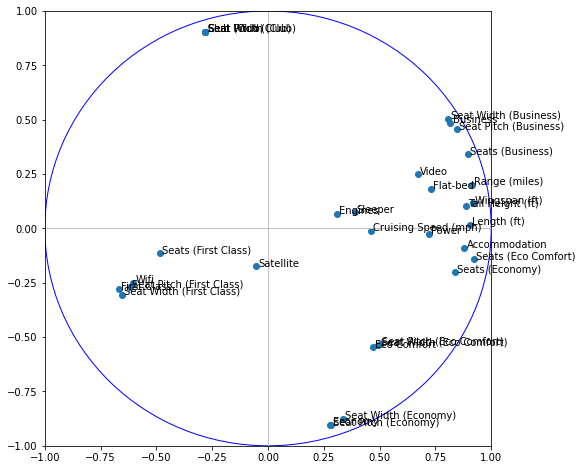

In [107]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(33):
     plt.annotate(df.columns[j],(corvar[j,0]+0.01,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

D'abord on remarque que les analyses faites grâce aux valeurs de corrélations étaient cohérentes .
Ici L'axe 1 est caractérisé principalement par les variables Seats .(à gauche les meilleurs seats first class et à droite les meilleurs seats classe Business)  
L'axe 2 sépare les deux classes Economy et Club par rapport aux variables Seatwidth et SeatPitch principalement .

L'analyse des autres cercle de corrélations(par rapport à l'axe 3) n'est pas forcémment intéressante dans la suite de l'étude.

# CAH et K-means

In [108]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

C = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(C,labels=data.index,orientation='right',color_threshold=0)
plt.show()

Plus la distance est importante plus la différence entre les classes est importante.
On choisit donc de couper à t=15 en prenant 4 classes , car si on prend moins ou plus que 4 classes les groupes ne seront pas assez distingués.

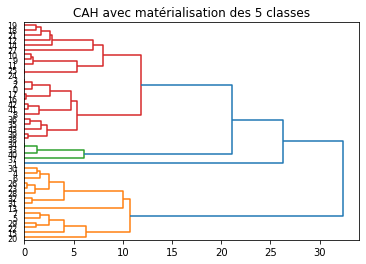

In [109]:
#matérialisation des 4 classes (hauteur t = 15)

plt.title('CAH avec matérialisation des 5 classes')
dendrogram(C,labels=data.index,orientation='right',color_threshold=15)
plt.show()

In [110]:
groupes_cah = fcluster(C,t=15,criterion='distance')


K-means:

In [111]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus (choisi graçe au CAH)
kmeans.fit(Z)

#index triés des groupes


idk = np.argsort(kmeans.labels_)
#kmean commence par 0 , classe 1 =0

Métrique silhouette K-means :

[0.42214626 0.45166233 0.51863183 0.40009306 0.37175038 0.39655704
 0.40585615 0.40506449 0.41195028 0.40831492 0.45735356 0.47188238
 0.48497358 0.47344459 0.44032136]


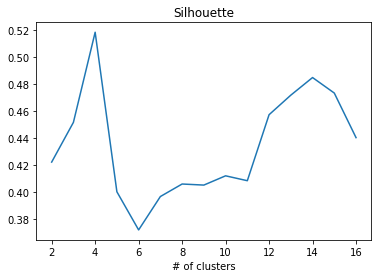

In [112]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 16
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(Z)
    res[k] = metrics.silhouette_score(Z,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

L'idéal pour la métrique silhouette est d'avoir une ordonnée la plus proche de 1 . On obtient cela lorsqu'on a 4 classes d'aprés le graphique , ce qui justifie notre choix de départ . 

Comparaison des classes de la CAH et de la K-means :

In [113]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0  1   2  3
row_0              
1      15  0   0  0
2       0  4   0  0
3       0  0  24  0
4       0  0   0  1

La classe 1 de CAH a 15 individus qui sont dans la classe 0 de K means et 0 ailleurs . 
La classe 2 de CAH a 4 individus qui sont dans la classe 3 de K means et 0 ailleurs .
La classe 3 de CAH possédé 24 individus dans la classe 1 de K means 
La classe 4 de CAH posséde son individu dans la classe 2 de K means 
Il y'a donc  parfaite correspondance entre les deux méthodes .

Etude des caractéristiques des groupes de K means : 

In [114]:
#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))
#kmean commence par 0 , classe 1 =0

[2 3 2 2 0 0 0 0 2 2 2 2 2 0 2 0 2 2 2 2 0 2 0 0 2 2 0 2 0 0 0 0 0 1 1 2 2
 1 2 2 1 2 2 2]
    0
0  26
0  23
0  22
0  28
0   4
0   5
0   6
0   7
0  20
0  29
0  30
0  31
0  32
0  13
0  15
1  34
1  37
1  40
1  33
2  27
2  35
2  36
2  38
2  39
2  41
2   0
2  21
2  24
2   2
2   3
2   8
2   9
2  10
2  25
2  11
2  14
2  16
2  17
2  18
2  19
2  42
2  12
2  43
3   1


En analysant les avions appartenant à chaque classe on tire les conclusions suivantes : 
La classe 0 de K means : Les avions qui se caractérisent par de bonnes first class.(Seats confortable , Wifi active..)
La classe 1 de K means : Les avions qui se caractérisent par de bonnes classes de business (Seats confortable ext..)
La classe 2 de K means est constitué d'un seul individu (1)c'est celle qui correspond à un avion VIP et donc correspond à l'avion où il y'a la classe club .
La classe 3 de K means : Les avions de la classe 3 ont de bonnes classes Economy (Seats confortable ext..)

ACP sur deux dimensions :

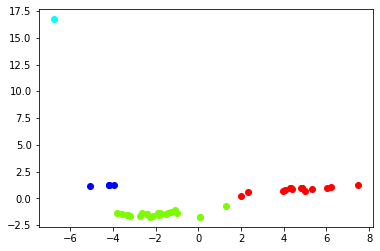

In [119]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(Z)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()



La classe 3 de K means est clairement distingué des autres on peut l'eliminer dans notre ACP afin d'améliorer l'analyse . 

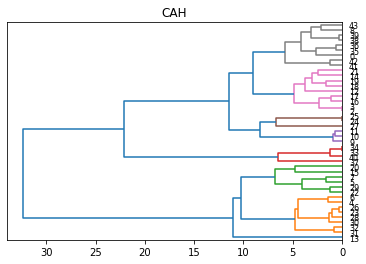

In [152]:
#retirer des observations le groupe n°2 du k-means précédent
data_subset = data.iloc[kmeans.labels_!=3,:]
dataa_subset=data_subset.iloc[:,1:34]

#centrer et réduire les valeurs :
data_subset_cr = sc.fit_transform(dataa_subset.values)

#générer la matrice des liens:

Z_subset = linkage(data_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=data_subset.index,orientation='left',color_threshold=7)
plt.show()

#groupes
groupes_subset_cah = fcluster(Z_subset,t=15,criterion='distance')


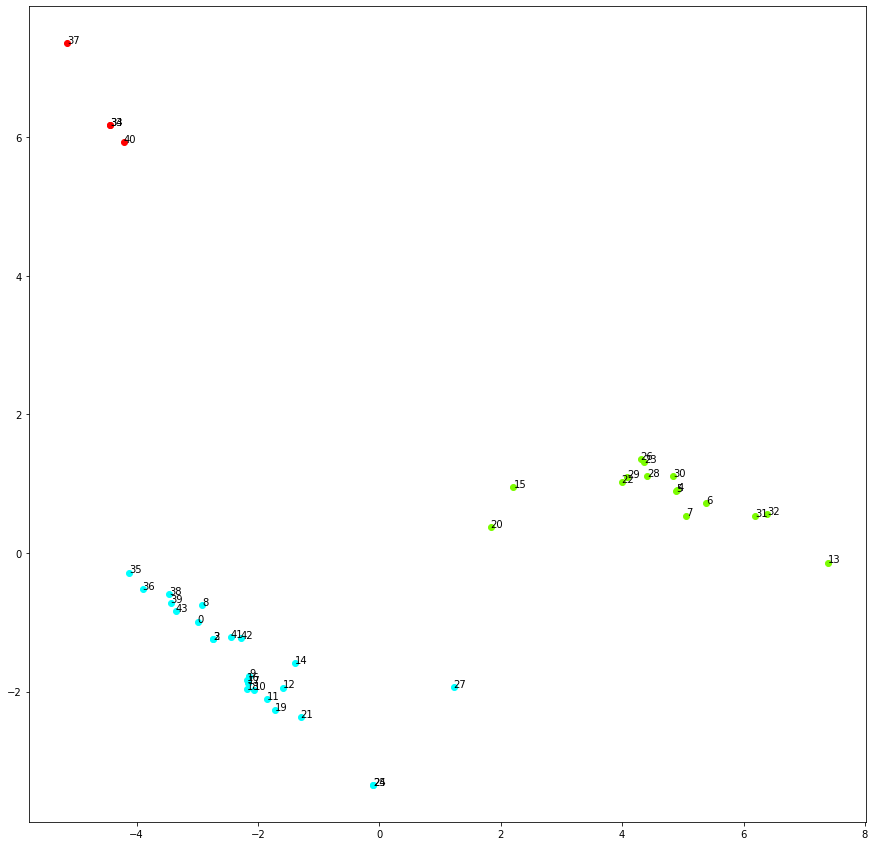

In [150]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(data_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(15,15))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
for i,label in enumerate(data_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

Même si l'analyse est plus précise , je ne vois ce qu'elle rajoute . Les avions n'ont pas changé de classe . 